In [1]:
import nltk
import random
import re
import pickle
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.classify.scikitlearn import SklearnClassifier

In [2]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

In [3]:
data = pd.read_csv('data/twitter_training.csv')
data.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [5]:
# remove unnecessary columns such as '2401' and 'Borderlands'
data.columns = ['Tag', 'Game', 'sentiment', 'tweet']
data.head(10)

,Tag,Game,sentiment,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [6]:
# remove unnecessary columns such as 'Tag' and 'Game'
data.drop(['Tag', 'Game'], axis=1, inplace=True)
data.head(10)

,sentiment,tweet
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
5,Positive,So I spent a few hours making something for fu...
6,Positive,So I spent a couple of hours doing something f...
7,Positive,So I spent a few hours doing something for fun...
8,Positive,So I spent a few hours making something for fu...
9,Positive,2010 So I spent a few hours making something f...


In [7]:
# count no of rows in data
data.shape

(74681, 2)

In [8]:
# drop nan values
data.dropna(inplace=True)

In [10]:
data.shape

(73995, 2)

In [11]:
def preprocessing(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [12]:
data['cleaned_tweet'] = data['tweet'].apply(preprocessing)

KeyboardInterrupt: 

In [13]:
# split data into train and test
from sklearn.model_selection import train_test_split

input_data = data['tweet']
output_data = data['sentiment']

x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=0)

In [14]:
# convert text into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8)
x_train = vectorizer.fit_transform(x_train).toarray()
x_test = vectorizer.transform(x_test).toarray()

In [15]:
# train model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [16]:
# Accuracy
model.score(x_test, y_test)

0.6100412190012838

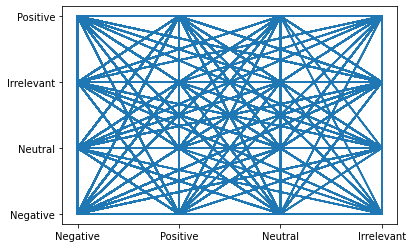

In [17]:
import matplotlib.pyplot as plt

plt.plot(model.predict(x_test), y_test)
plt.show()

In [18]:
# save model
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

In [19]:
# load model to make predictions
model = pickle.load(open('model.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

In [23]:
text = 'I am so happy'
text = preprocessing(text)
text = vectorizer.transform([text]).toarray()
model.predict(text)[0]

'Positive'